In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [2]:
df = pd.read_csv("C:/fili/jupyter_proyectos/breast-cancer.csv")

df.head()
df.info()
df["diagnosis"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

diagnosis
B    357
M    212
Name: count, dtype: int64

In [3]:
# Eliminar columna id si existe
if "id" in df.columns:
    df = df.drop(columns=["id"])

# Codificar diagnosis
df["diagnosis"] = df["diagnosis"].map({"B": 0, "M": 1})

# Separar características y objetivo
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test
    random_state=42,
    stratify=y          # mantiene proporción B/M
)


In [6]:
tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    "max_depth": [3, 4, 5, 6, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,
    scoring="f1",      # importante equilibrar precisión/recall para clase positiva (maligno)
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor score CV (f1):", grid_search.best_score_)


Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mejor score CV (f1): 0.9328896983842206


In [8]:
best_tree = grid_search.best_estimator_



In [9]:
# Predicciones finales
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)


In [10]:
y_test_pred[:5]


array([0, 1, 0, 1, 0])

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm


array([[72,  0],
       [ 7, 35]])

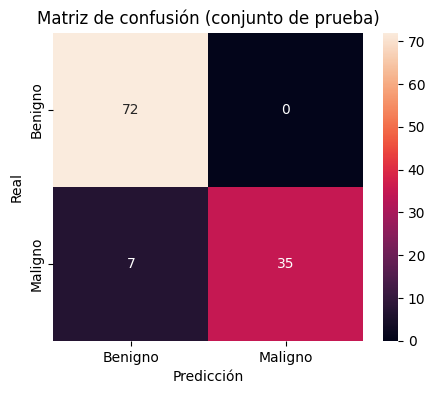

In [12]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Benigno", "Maligno"], yticklabels=["Benigno", "Maligno"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión (conjunto de prueba)")
plt.show()


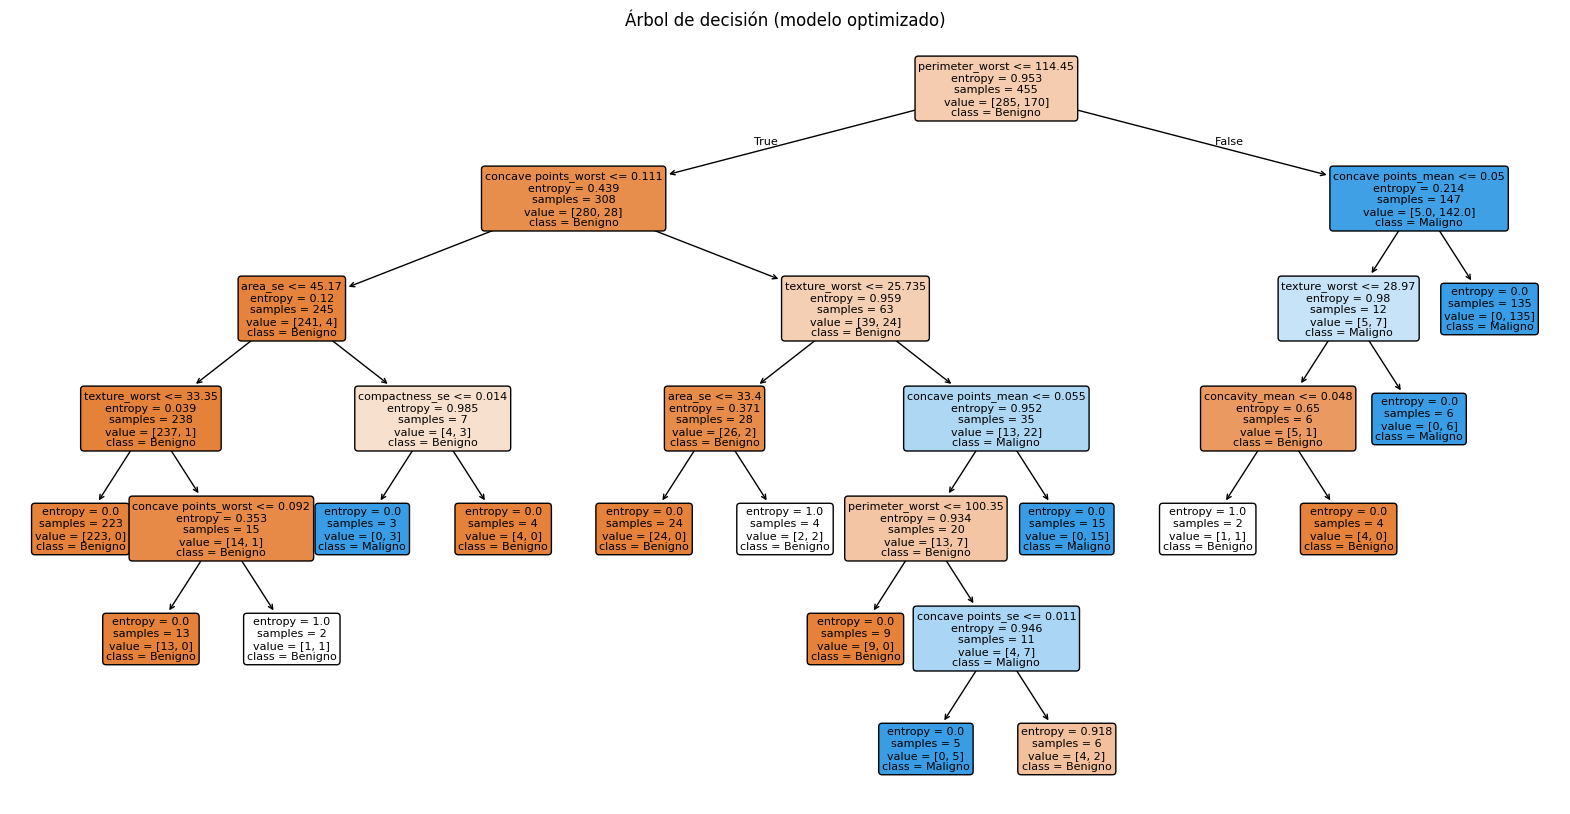

In [13]:
plt.figure(figsize=(20,10))
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=["Benigno", "Maligno"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árbol de decisión (modelo optimizado)")
plt.show()


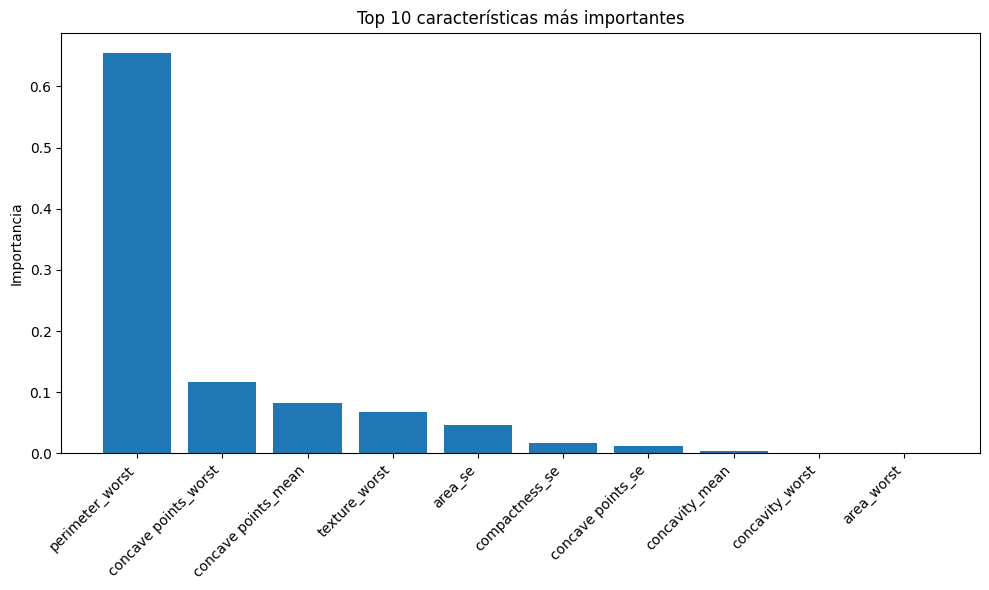

In [14]:
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), X.columns[indices[:10]], rotation=45, ha="right")
plt.ylabel("Importancia")
plt.title("Top 10 características más importantes")
plt.tight_layout()
plt.show()

